In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from alglin2cv import angle2vector
%matplotlib inline

In [3]:
df = pd.read_csv('results.csv', sep=';')

In [4]:
orix = np.array(df.orix)/5
oriy = np.array(df.oriy)/5
goalx = np.array(df.goalx)/100
goaly = np.array(df.goaly)/100

In [5]:
x_pos = [0, 0]
y_pos = [0, 0]
x_direct = [orix[20], goalx[20]]
y_direct = [oriy[20], goaly[20]]

In [7]:
X = np.array([0, 0])
Y = np.array([0, 0])

In [8]:
U = np.array([orix[1], goalx[1]])
V = np.array([oriy[1], goaly[1]])

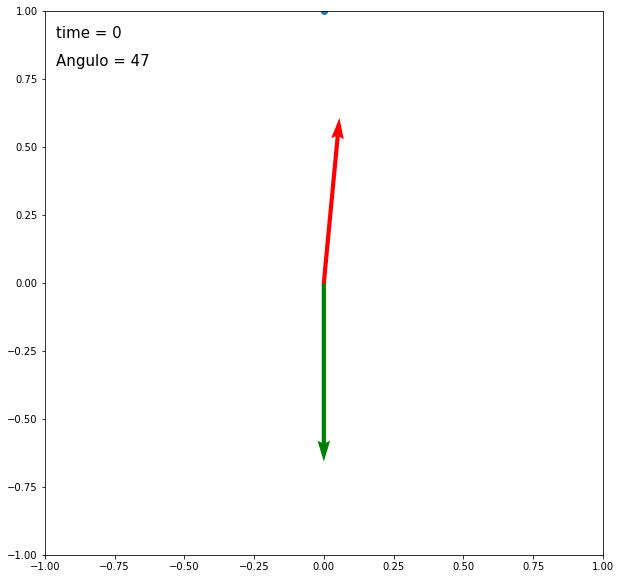

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

Q = ax.quiver(X, Y, U, V, color=['g', 'r'], scale=5)

ax.scatter(0, 1)
ax.quiverkey(Q, X=0.3, Y=1.1, U=1,
             label='Car orientation', labelpos='E', color='g')
ax.quiverkey(Q, X=0.3, Y=3, U=1,
             label='Angle to goal', labelpos='E', color='r')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=15)
angle_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=15)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
       
    U = np.array([orix[num], goalx[num]])
    V = np.array([oriy[num], goaly[num]])

    angle = angle2vector(V, U)
    
    time_text.set_text('time = %d' % num)
    angle_text.set_text('Angulo = %d' % angle)
    Q.set_UVC(U,V)

    return Q,
# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q,X, Y),
                               interval=1000, blit=False)


HTML(anim.to_html5_video())
